In [65]:
import os
import glob
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

In [66]:
glob.glob(os.path.join(os.path.abspath(""),"*"))

['c:\\Users\\Bartek\\Desktop\\Pokemon\\baraja\\Pokemony\\pokemony.txt',
 'c:\\Users\\Bartek\\Desktop\\Pokemon\\baraja\\Pokemony\\pokemon_202110171358.csv',
 'c:\\Users\\Bartek\\Desktop\\Pokemon\\baraja\\Pokemony\\Pokemon_Dev.ipynb',
 'c:\\Users\\Bartek\\Desktop\\Pokemon\\baraja\\Pokemony\\trainers_202110171359.csv']

In [67]:
full = pd.read_csv("pokemon_202110171358.csv")
df_pokemons = pd.read_csv("pokemon_202110171358.csv")
df_trainers = pd.read_csv("trainers_202110171359.csv")

In [68]:
# print(df_pokemons)
# print(list(df_pokemons.columns))

# Obliczenie zadawanego zniszczenia i dodanie kolumny"demage"
#
    # Wzór:
    # damage = ((((2*level/5)+2)+(A/D)/50)+2)*random*type
        # gdzie: level = p.pokelevel
        # A = attack lub spatk
        # D = defense lub spdef
        # random = random integer percentage between 0.85 and 1.00 (inclusive)
        # type = type effectiveness (edited) 
# Zastanowić się czy współczynnik "random" przenieść do wyliczenia przed walką (żeby uniknąć powtarzalnych wartość dla całego dataframe)
df_pokemons["damage_physical"] = round(((((2 * df_pokemons["pokelevel"])/5)+(df_pokemons["attack"]/df_pokemons["defense"])/50)+2)*(rd.randint(85, 100)/100)) # *type - zdefiniować
df_pokemons["damage_special"] = round(((((2 * df_pokemons["pokelevel"])/5)+(df_pokemons["spatk"]/df_pokemons["spdef"])/50)+2)*(rd.randint(85, 100)/100)) # *type - zdefiniować

# Wylosowanie n pokemonów do dalszej gry
df_pokemons = df_pokemons.sample(100)

# Wylosowanie 3 pokemonów dla ai (przeciwnik)
df_ai_pokemons = df_pokemons.sample(3)

# Reset indeksów dla wylosowanych baraja_pokemonów
df_pokemons = df_pokemons.reset_index(drop=True)

# Reset indeksów dla wylosowanych ai_pokemonów
df_ai_pokemons = df_ai_pokemons.reset_index(drop=True)

# Wybór pokemona do symulacji
wybor_pokemona = int(input("Wybierz baraja_pokemona wpisując liczbę od 0 do 99:\n"))
wybor_ai_pokemona = int(input("Wybierz ai_pokemona wpisując liczbę od 0 do 2:\n"))

# Przypisanie wybranego pokemona do zmiennej baraja_poke
baraja_poke = df_pokemons.iloc[wybor_pokemona , :]
ai_poke = df_ai_pokemons.iloc[wybor_ai_pokemona, :]

# Wyświetlenie nazwy pokemona i jego typów
print("Pokemon baraja:",baraja_poke[2],baraja_poke[4],baraja_poke[5])
print("Pokemon AI:",ai_poke[2],ai_poke[4],ai_poke[5])

df_ai_pokemons.head()
# print(df_pokemons.iloc[ wybor_pokemona , : ]) #wyświetla dane dla wybranego pokemona po liczbie

IndexError: single positional indexer is out-of-bounds

In [ ]:
# Wyszukanie współczynnika "type" do wzoru demage
# Funkcja ma zwrócić wartości współczynnika "type" jako float, który będzie wykorzystany do obliczenia "demage" i "special demage"
#      zmienne wymagane do fukncji: typ pokemona atakującego (baraja_poke) i broniącego się (ai_poke)

df_type = pd.read_excel(r"C:\Users\Pingwiny\baraja\Pokemony\poke_type.xlsx")
# df_type = df_type.rename_axis()
# index = ["Normal","Fighting","Flying","Poison","Ground","Rock","Bug","Ghost","Steel","Fire","Water","Grass","Electric","Psychc","Ice","Dragon","Dark","Fairy"]
#             columns=["Normal","Fighting","Flying","Poison","Ground","Rock","Bug","Ghost","Steel","Fire","Water","Grass","Electric","Psychc","Ice","Dragon","Dark","Fairy"])
# df_type = df_type.drop(['Unnamed: 0'], axis=1)

df_type = df_type.set_index("Unnamed: 0")
df_type = df_type.rename_axis("", axis="index")

#zmienne_1: nazwa i typy pokemona baraja.
baraja_pokename = baraja_poke[2]
baraja_poke_type1 = baraja_poke[4]
baraja_poke_type2 = baraja_poke[5]
print(f"Your Pokemon is {baraja_pokename} and it is {baraja_poke_type1} and {baraja_poke_type2} type.")
#zmienne_2: nazwa i typy pokemona ai - przeciwnik.
ai_pokename = ai_poke[2]
ai_poke_type1 = ai_poke[4]
ai_poke_type2 = ai_poke[5]
print(f"Opponent's Pokemon is {ai_pokename} and it is {ai_poke_type1} and {ai_poke_type2} type.")

type_factor = float(df_type.loc[baraja_poke_type1, ai_poke_type1])
print(type_factor, type(type_factor))

In [69]:
full["damage_physical"] = round(((((2 * full["pokelevel"])/5)+(full["attack"]/full["defense"])/50)+2)*(rd.randint(85, 100)/100)) # *type - zdefiniować
full["damage_special"] = round(((((2 * full["pokelevel"])/5)+(full["spatk"]/full["spdef"])/50)+2)*(rd.randint(85, 100)/100)) # *type - zdefiniować

In [70]:
def opp():
    rd_find = rd.randint(1,len(full))
    rd_poke = full.loc[rd_find]
    name =  rd_poke["pokename"]
    typ = rd_poke["type1"]
    index = rd_find
    print(f"Twój przeciwnik to {name}.\nJego typ to {typ}. Numer indexu pokemona to {index}")
    if typ == "Fire" or typ == "Water" or typ == "Grass" or typ == "Electric" or typ == "Ice" or typ == "Psychic":
        damage = rd_poke["damage_physical"] * rd_poke["hp"]
        return f"Wynik to {damage}"
    else:
        damage = rd_poke["damage_special"] * rd_poke["hp"]
        return f"Wynik to {damage}"
    


print(opp())

# def ranking():


# print(ranking())

Twój przeciwnik to Grimer.
Jego typ to Poison. Numer indexu pokemona to 25500
Wynik to 252.0


In [71]:
full["result"] = full["damage_special"] * full["hp"]


s = int(input("Wpisz index pokemona "))
s_chosen = full.loc[s]["result"]

print(s_chosen)
greater = full[full["result"] >= s_chosen].count()
print(greater["result"])
lower = full[full["result"] < s_chosen].count()

win = round((greater["result"] / len(full)),2)
loose = round((1 - win),2)
print(f"Wygrasz z {win} przeciwników oraz przegrasz z {loose} przeciwników")

1972.0
14012
Wygrasz z 0.49 przeciwników oraz przegrasz z 0.51 przeciwników


In [ ]:
# 1. STATYSTYKA
#     > zestawienie sumaryczne pokelevelow przez typy pokemonów uwzględniając liczebność,
#     > wyznaczenie prawdopodobieństwa wylosowania kart danego typu,
#     > dodanie demage albo special demage w zależności od typu pokemona:
#         >> przyjmujemy zakres demage - dwie kolumny: demage min (wartość random=0,85), demage max (wartość random=1,0)
#             >>> dla każdego pokemona, następnie liczymy średni demage dla danych typów
#             >>> zestawiamy z prawdopodobieństwem wylosowania danego typu
#             >>> dla każdego typu przedstawić demage w formie wykresu skrzynkowego (max, min i średnia)
#         >> "defense" do statystyki (wyliczenie we wzorze "demage") = 1 - jest to wartość pobierana od przeciwnika = obniża "demage" atakującego,
#         >> Rodzaj ataku w funkcji typu pokemona:
#             >>> physical attack: Fire, Water, Grass, Electric, Ice, Psychic, Steel
#             >>> special attack: Normal, Fighting, Flying, Ground, Rock, Bug, Poison, Ghost, Dragon, Dark
#     > zastanowić się jak uwzględnić HP (zdrowie) - odejmowanie po ataku. 
#  Rodzaj ataku w funkcji typu pokemona:
#    physical attack: Fire, Water, Grass, Electric, Ice, Psychic, Steel
#    special attack: Normal, Fighting, Flying, Ground, Rock, Bug, Poison, Ghost, Dragon, Dark

In [ ]:
# print(df_pokemons)
# print(list(df_pokemons.columns))

# Obliczenie zadawanego zniszczenia i dodanie kolumny"demage"
#
    # Wzór:
    # damage = ((((2*level/5)+2)+(A/D)/50)+2)*random*type
        # gdzie: level = p.pokelevel
        # A = attack lub spatk
        # D = defense lub spdef
        # random = random integer percentage between 0.85 and 1.00 (inclusive)
        # type = type effectiveness (edited) 
# Zastanowić się czy współczynnik "random" przenieść do wyliczenia przed walką (żeby uniknąć powtarzalnych wartość dla całego dataframe)
df_pokemons["damage_physical"] = round(((((2 * df_pokemons["pokelevel"])/5)+(df_pokemons["attack"]/df_pokemons["defense"])/50)+2)*(rd.randint(85, 100)/100)) # *type - zdefiniować
df_pokemons["damage_special"] = round(((((2 * df_pokemons["pokelevel"])/5)+(df_pokemons["spatk"]/df_pokemons["spdef"])/50)+2)*(rd.randint(85, 100)/100)) # *type - zdefiniować

# Utworzenie listy z indeksów pokemonów - do wykorzystania przy losowaniu random
# pokemons_indexes = list(df_pokemons.index.values)
# Wylosowanie n=10 pokemonów do dalszej gry
## >>>>>>> Wypisać numer i nazwę pokemona <<<<<<< np. osobne 
df_pokemons = df_pokemons.sample(100)
df_pokemons = df_pokemons.reset_index(drop=True) #nowe indeksy dla wylosowanych pokemonów

while True:
    wybor_pokemona = int(input("Wybierz Pokemona wpisując liczbę od 0 do 99:\n")) #prośba o wybór pokemona do symulacji
    if wybor_pokemona >= 0 and wybor_pokemona < 100:
        break
    else:
        print("Wprowadź liczbę z zakresu od 0 do 99, która reprezentuje losowo wybranego Pokemona:")
    
    
print(df_pokemons.iloc[wybor_pokemona , : ]) #wyświetla dane dla wybranego pokemona po liczbie

In [ ]:
# Intro do symulatora walki pokemonów
print("""
         ***************************************      `;-.          ___,
         * Witaj w symulatorze walki Pokemonów *        `.`\_...._/`.-"`
         ***************************************          \        /      ,
                                                          /()   () \    .' `-._ 
                     _                                   |)  .    ()\  /   _.'     
         _ __   ___ | | _____ _ __ ___   ___  _ __       \  -'-     ,; '. < 
        | '_ \ / _ \| |/ / _ \ '_ ` _ \ / _ \| '_ \       ;.__     ,;|   > \\
        | |_) | (_) |   <  __/ | | | | | (_) | | | |     / ,    / ,  |.-'.-'
        | .__/ \___/|_|\_\___|_| |_| |_|\___/|_| |_|    (_/    (_/ ,;|.<`
        |_|                                               \    ,     ;-`
                                                           >   \    /
                                                          (_,-'`> .'
                                                               (_,'
""")


In [ ]:
def pull60():
    poke_list = full[["pokename", "type1"]]
    newlista = poke_list.sample(n = 60).sort_index()
    return newlista



In [176]:
def wykres_atak():
    num = int(input())

    pn = full.iloc[num]["pokename"]
    pl = full[full["pokename"] == pn]["attack"].to_numpy()
    z = full[full["pokename"] == pn]
    pl.sort()

    atk = full.iloc[num]["attack"]

    a = full[full["pokename"] == pn]["attack"].sort_values().to_numpy()
    z = 1 #pierwszy 

    for g in a:
        if g < full.iloc[num]["attack"]:
            z += 1

    plt.plot(pl) #Jak wyglądają pokemony tej samej nazwy na osi
    plt.scatter(x=z, y= atk) #Gdzie dokładnie jest nasz pokemon
    plt.title("Attack - " + pn )



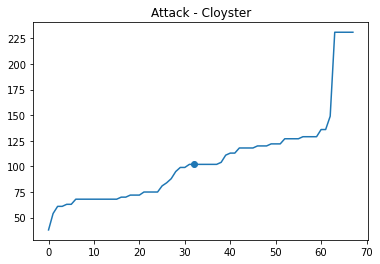

In [177]:
wykres_atak()